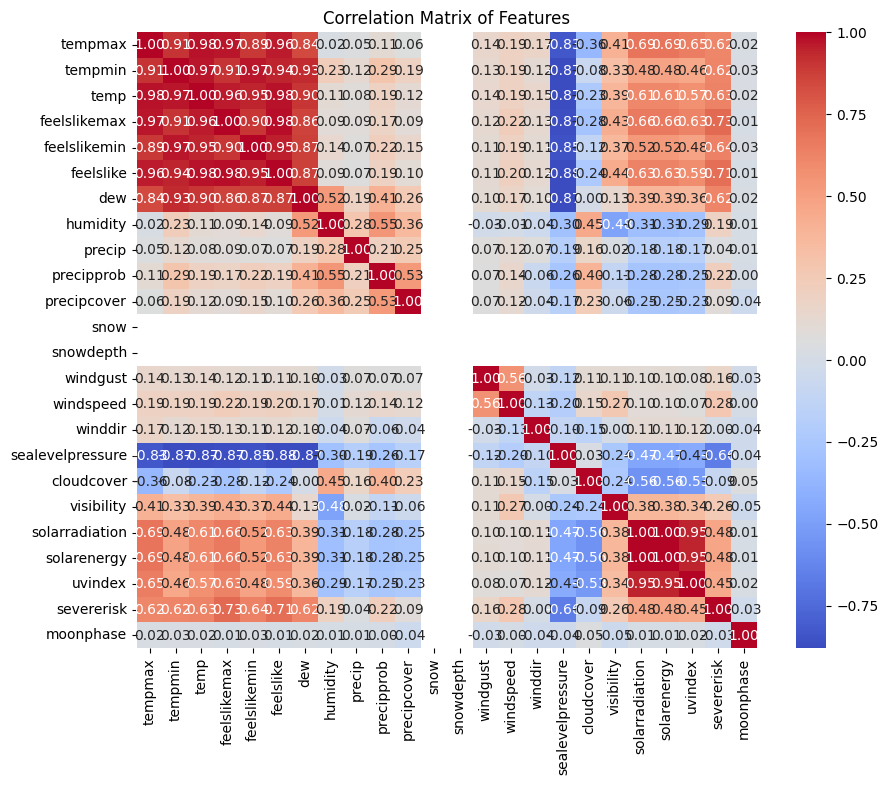

Correlation of 'dew' with other features:
tempmax             1.000000
temp                0.977956
feelslikemax        0.967255
feelslike           0.958574
tempmin             0.910488
feelslikemin        0.894834
dew                 0.843498
solarradiation      0.688866
solarenergy         0.688858
uvindex             0.649357
severerisk          0.618100
visibility          0.410551
windspeed           0.194989
winddir             0.165546
windgust            0.142072
precipprob          0.111252
precipcover         0.055966
precip              0.049157
humidity            0.019068
moonphase           0.018809
cloudcover         -0.355167
sealevelpressure   -0.833873
snow                     NaN
snowdepth                NaN
Name: tempmax, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset/data.csv'  # Adjust the path to your dataset
data = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Check correlation with the 'feelslike' feature
feelslike_corr = correlation_matrix['tempmax'].sort_values(ascending=False)
print("Correlation of 'dew' with other features:")
print(feelslike_corr)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the features and target (feelslike)
X = data[['tempmax', 'tempmin', 'humidity', 'windspeed', 'dew']]  # You can include more features if available
y = data['feelslike']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

# Display the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Impact on Feelslike Temperature (Linear Regression Coefficients):")
print(coefficients)

# Display the intercept
print(f"Intercept: {model.intercept_}")


R² Score: 0.956
Feature Impact on Feelslike Temperature (Linear Regression Coefficients):
     Feature  Coefficient
4        dew     1.226752
0    tempmax     0.169272
1    tempmin     0.086698
3  windspeed     0.010364
2   humidity    -0.295825
Intercept: 18.492251791486368


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importances)


Feature Importance (Random Forest):
     Feature  Importance
1    tempmin    0.826571
0    tempmax    0.145355
4        dew    0.023302
2   humidity    0.003324
3  windspeed    0.001448
